<pre>1.	What is the overall survival rate of passengers on the Titanic?
Calculate the percentage of passengers who survived.

2.	How does survival rate vary by gender?
Compare the survival rates between male and female passengers.

3.	Did passengers in certain passenger classes have a better chance of survival?
Analyze the survival rates among different passenger classes (e.g., first    class, second class, third class).

4.	What was the survival rate among different age groups?
Divide passengers into age groups (e.g., children, adults, seniors) and analyze their survival rates.

5.	Did passengers traveling with family members have a better chance of survival?
Compare the survival rates of passengers traveling alone versus passengers traveling with family members.

6.	Were passengers who embarked from certain ports more likely to survive?
Analyze the survival rates among passengers who embarked from different   ports (e.g., Southampton, Cherbourg, Queenstown).

7.	What was the survival rate among passengers with different titles (e.g., Mr., Mrs., Miss)?
Extract titles from passenger names and analyze the survival rates among different titles.

8.	How did fare prices vary among different passenger classes?
Compare the fare prices paid by passengers in first, second, and third class.

9.	Did having a cabin affect the survival rate?
Analyze the survival rates of passengers with and without cabins.

10.	What was the survival rate among passengers with missing data (e.g., missing age or cabin information)?
Analyze the survival rates of passengers with missing data in various fields.


</pre>

In [489]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [490]:
df = pd.read_csv(r'/Users/rupeshchauhan/Downloads/Titanic-Dataset.csv')

In [491]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [492]:
# how many passangers paid less than avg price?
(df.Fare<(df.Fare.mean())).value_counts()[0]

680

In [493]:
df.tail(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [494]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [495]:
#  how many passengers paid 0 fare
len(df[df.Fare == 0])

15

In [496]:
# how many male and female passengers are there
print("Male are  :",df.Sex.value_counts()[0])
print("Female are:",df.Sex.value_counts()[1])

Male are  : 577
Female are: 314


In [497]:
df.Sex.value_counts(normalize=True) 

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

In [498]:
1 - 0.647587

0.352413

In [499]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [500]:
# What is the overall survival rate of passengers on the Titanic?
(sum(df[df.Survived==1].Survived)/len(df.Survived) )*100

38.38383838383838

In [501]:
(sum(df[df.Survived == 1].Survived)/df.Survived.value_counts().sum())*100

38.38383838383838

In [502]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [503]:
# How does survival rate vary by gender?
malealive = (sum(df[df.Sex=='male'].Survived==1)/len(df[df.Sex=='male'].Survived))*100

In [504]:
maledied= (sum(df[df.Sex=='male'].Survived==0)/len(df[df.Sex=='male'].Survived))*100

In [505]:
femalealive = (sum(df[df.Sex=='female'].Survived==1)/len(df[df.Sex=='female'].Survived))*100

In [506]:
femaledied = (sum(df[df.Sex=='female'].Survived==0)/len(df[df.Sex=='female'].Survived))*100

In [507]:
pd.DataFrame({'malealive':malealive,'maledies':maledied,'femalealive':femalealive,'femaledied':femaledied},index=['%'])

,malealive,maledies,femalealive,femaledied
%,18.890815,81.109185,74.203822,25.796178


In [508]:
# Did passengers in certain passenger classes have a better chance of survival?
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [509]:
print('pclass 1 survived 1',(sum(df[(df['Pclass'] == 1) & (df['Survived'] == 1)].Survived)/len(df[(df['Pclass'] == 1)].Pclass))*100)
# print('pclass 1 survived 0',(sum(df[(df['Pclass'] == 1) & (df['Survived'] == 0)].Survived)/len(df[(df['Pclass'] == 1)].Pclass))*100)

pclass 1 survived 1 62.96296296296296


In [510]:
print('pclass 1 survived 1',(sum(df[(df['Pclass'] == 2) & (df['Survived'] == 1)].Survived)/len(df[(df['Pclass'] == 2)].Pclass))*100)
# print('pclass 1 survived 0',(sum(df[(df['Pclass'] == 2) & (df['Survived'] == 0)].Survived)/len(df[(df['Pclass'] == 2)].Pclass))*100)

pclass 1 survived 1 47.28260869565217


In [511]:
print('pclass 1 survived 1',(sum(df[(df['Pclass'] == 3) & (df['Survived'] == 1)].Survived)/len(df[(df['Pclass'] == 3)].Pclass))*100)

pclass 1 survived 1 24.236252545824847


In [512]:
(sum(df[df.Pclass == 3].Survived ==1)/sum((df[df.Pclass == 3].Pclass)))*100

8.078750848608282

In [513]:
(119/1473)*100

8.078750848608282

In [514]:
df.groupby('Pclass')['Survived'].value_counts(normalize=True)*100

Pclass  Survived
1       1           62.962963
        0           37.037037
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: proportion, dtype: float64

In [515]:
# Divide passengers into age groups (e.g., children, adults, seniors) and analyze their survival rates.
# childrens and teenAge
print('Age group 1 to 19 teen survived %',
(sum(df[(df['Age'] < 20) & (df['Survived'] == 1)].Survived)/len(df[(df['Age'] < 20) & (df['Survived'] == 1)].Age))*100)

Age group 1 to 19 teen survived % 100.0


In [516]:
# Adults
print('Age group 1 to 19 teen survived %',
(sum(df[(df['Age'] < 20) & (df['Survived'] == 1)].Survived)/len(df[(df['Pclass'] == 3)].Pclass))*100)

Age group 1 to 19 teen survived % 16.08961303462322


In [517]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [518]:
child = df[(df['Age'].between(1, 18) & (df['Survived'] == 1))]
child.Survived.value_counts()

#  because we dont have any count for 0 means all the people between 1 to 18 age they survived.

Survived
1    63
Name: count, dtype: int64

In [519]:
child.groupby('Age')['Survived'].value_counts(normalize=True)*100

Age   Survived
1.0   1           100.0
2.0   1           100.0
3.0   1           100.0
4.0   1           100.0
5.0   1           100.0
6.0   1           100.0
7.0   1           100.0
8.0   1           100.0
9.0   1           100.0
11.0  1           100.0
12.0  1           100.0
13.0  1           100.0
14.0  1           100.0
15.0  1           100.0
16.0  1           100.0
17.0  1           100.0
18.0  1           100.0
Name: proportion, dtype: float64

In [520]:
# there is 100% chance of survival

In [521]:
adults = df[df['Age'].between(20, 50)]# & (df['Survived'] == 1))]# & (df['Age'] == 1)]
adults

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [522]:
adults.groupby('Age')['Survived'].value_counts(normalize=True)

Age   Survived
20.0  0           0.800000
      1           0.200000
20.5  0           1.000000
21.0  0           0.791667
      1           0.208333
                    ...   
48.0  0           0.333333
49.0  1           0.666667
      0           0.333333
50.0  0           0.500000
      1           0.500000
Name: proportion, Length: 72, dtype: float64

In [523]:
seniors = df[(df['Age']>50 & (df['Survived'] == 1))] 
seniors.groupby('Age')['Survived'].value_counts(normalize=True)

Age    Survived
0.42   1           1.0
0.67   1           1.0
0.75   1           1.0
0.83   1           1.0
0.92   1           1.0
                  ... 
70.00  0           1.0
70.50  0           1.0
71.00  0           1.0
74.00  0           1.0
80.00  1           1.0
Name: proportion, Length: 142, dtype: float64

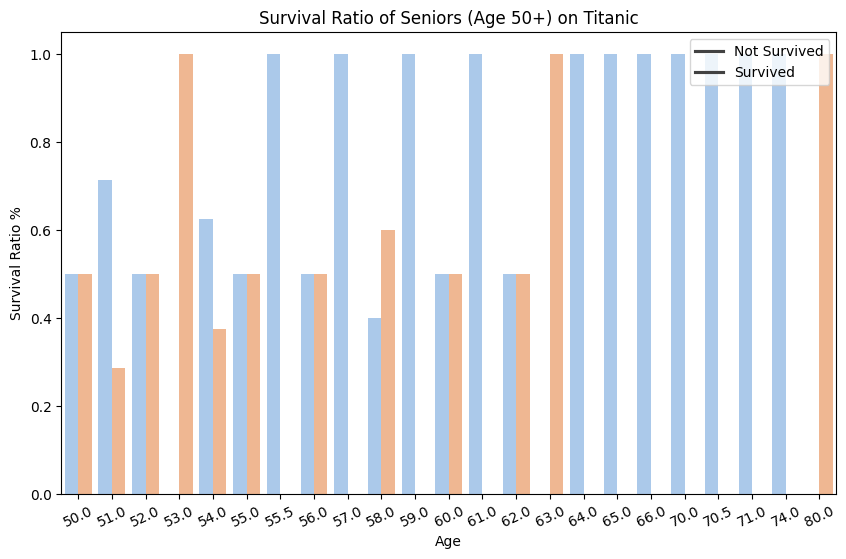

In [524]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have loaded your Titanic dataset into a DataFrame named 'df'

# Filter out individuals aged 50 or older
seniors = df[df['Age'] >= 50]

# Group by age and calculate survival ratio
survival_ratio = seniors.groupby('Age')['Survived'].value_counts(normalize=True).unstack().fillna(0)

# Reset index and reshape data for Seaborn
survival_ratio.reset_index(inplace=True)
survival_ratio = survival_ratio.melt(id_vars=['Age'], value_vars=[0, 1], var_name='Survived', value_name='Survival Ratio')

# Enlarge the figure
plt.figure(figsize=(10, 6))

# Plot the survival ratio using Seaborn
sns.barplot(data=survival_ratio, x='Age', y='Survival Ratio', hue='Survived', palette='pastel')
plt.title('Survival Ratio of Seniors (Age 50+) on Titanic')
plt.xlabel('Age')
plt.ylabel('Survival Ratio %')
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.xticks(rotation=25)
plt.show()

#### Did passengers traveling with family members have a better chance of survival?

In [525]:
df.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [526]:
df.groupby('SibSp')['Survived'].value_counts(normalize=True)*100

SibSp  Survived
0      0            65.460526
       1            34.539474
1      1            53.588517
       0            46.411483
2      0            53.571429
       1            46.428571
3      0            75.000000
       1            25.000000
4      0            83.333333
       1            16.666667
5      0           100.000000
8      0           100.000000
Name: proportion, dtype: float64

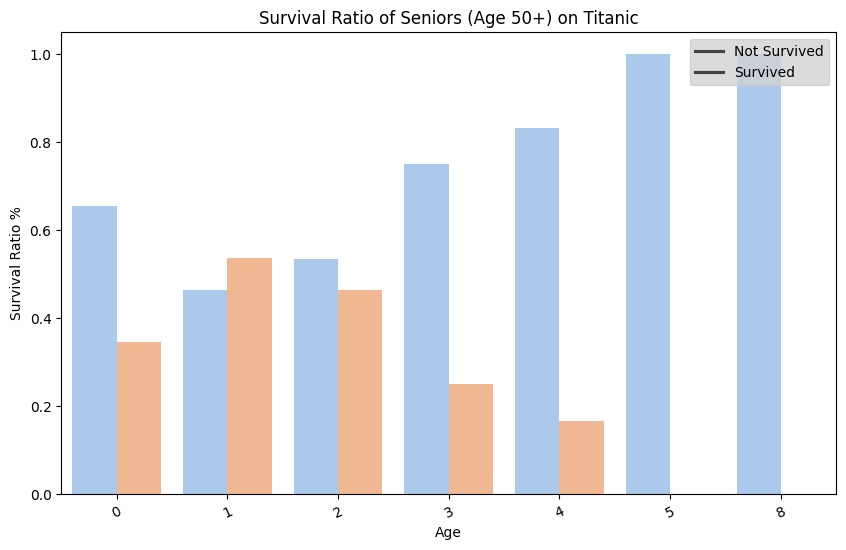

In [527]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have loaded your Titanic dataset into a DataFrame named 'df'

# Filter out individuals aged 50 or older
# seniors = df[df['Age'] >= 50]

# Group by age and calculate survival ratio
survival_ratio = df.groupby('SibSp')['Survived'].value_counts(normalize=True).unstack().fillna(0)

# Reset index and reshape data for Seaborn
survival_ratio.reset_index(inplace=True)
survival_ratio = survival_ratio.melt(id_vars=['SibSp'], value_vars=[0, 1], var_name='Survived', value_name='Survival Ratio')

# Enlarge the figure
plt.figure(figsize=(10, 6))

# Plot the survival ratio using Seaborn
sns.barplot(data=survival_ratio, x='SibSp', y='Survival Ratio', hue='Survived', palette='pastel',legend='auto')
plt.title('Survival Ratio of Seniors (Age 50+) on Titanic')
plt.xlabel('Age')
plt.ylabel('Survival Ratio %')
plt.legend(['Not Survived', 'Survived'], loc='upper right', facecolor='lightgrey')  # Changing legend facecolor
plt.xticks(rotation=25)
plt.show()


6.	Were passengers who embarked from certain ports more likely to survive?
-  Analyze the survival rates among passengers who embarked from different   ports (e.g., Southampton, Cherbourg, Queenstown).

In [528]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [529]:
df.groupby('Embarked')['Survived'].value_counts(normalize=True)*100

Embarked  Survived
C         1           55.357143
          0           44.642857
Q         0           61.038961
          1           38.961039
S         0           66.304348
          1           33.695652
Name: proportion, dtype: float64

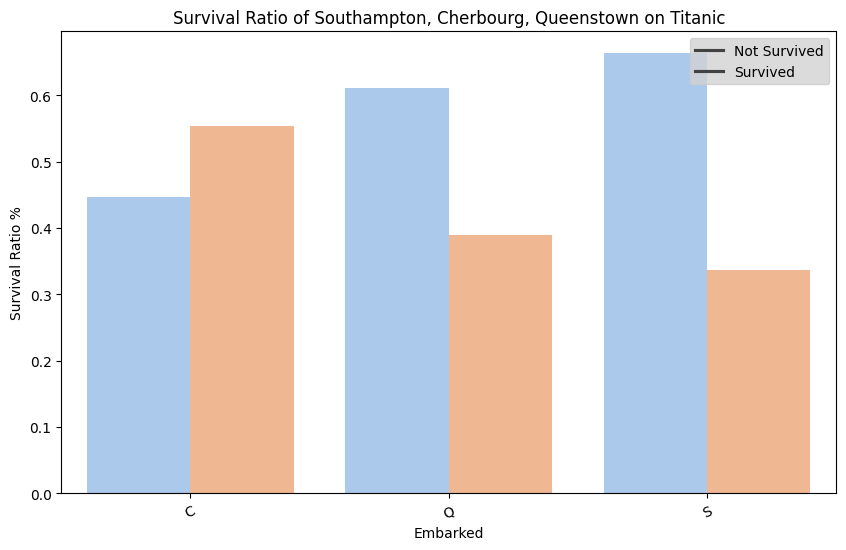

In [530]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have loaded your Titanic dataset into a DataFrame named 'df'

# Filter out individuals aged 50 or older
# seniors = df[df['Age'] >= 50]

# Group by age and calculate survival ratio
survival_ratio = df.groupby('Embarked')['Survived'].value_counts(normalize=True).unstack().fillna(0)

# Reset index and reshape data for Seaborn
survival_ratio.reset_index(inplace=True)
survival_ratio = survival_ratio.melt(id_vars=['Embarked'], value_vars=[0, 1], var_name='Survived', value_name='Survival Ratio')

# Enlarge the figure
plt.figure(figsize=(10, 6))

# Plot the survival ratio using Seaborn
sns.barplot(data=survival_ratio, x='Embarked', y='Survival Ratio', hue='Survived', palette='pastel',legend='auto')
plt.title('Survival Ratio of Southampton, Cherbourg, Queenstown on Titanic')
plt.xlabel('Embarked')
plt.ylabel('Survival Ratio %')
plt.legend(['Not Survived', 'Survived'], loc='upper right', facecolor='lightgrey')  # Changing legend facecolor
plt.xticks(rotation=25)
plt.show()


#### 7.	What was the survival rate among passengers with different titles (e.g., Mr., Mrs., Miss)?
- Extract titles from passenger names and analyze the survival rates among different titles.

In [531]:
def gettiles(x):
    if 'Mr.' in x:
        return 1
    elif 'Mrs.' in x:
        return 2
    elif 'Miss.' in x:
        return 3
df['NameTitles'] = ''
df['NameTitles'] = df['Name'].apply(lambda x: gettiles(x))

In [532]:
# df.Name
df.groupby('NameTitles')['Survived'].value_counts(normalize=True)*100
# 1 Mr.
# 2 Mrs.
# 3 Miss

NameTitles  Survived
1.0         0           84.332689
            1           15.667311
2.0         1           79.200000
            0           20.800000
3.0         1           69.780220
            0           30.219780
Name: proportion, dtype: float64

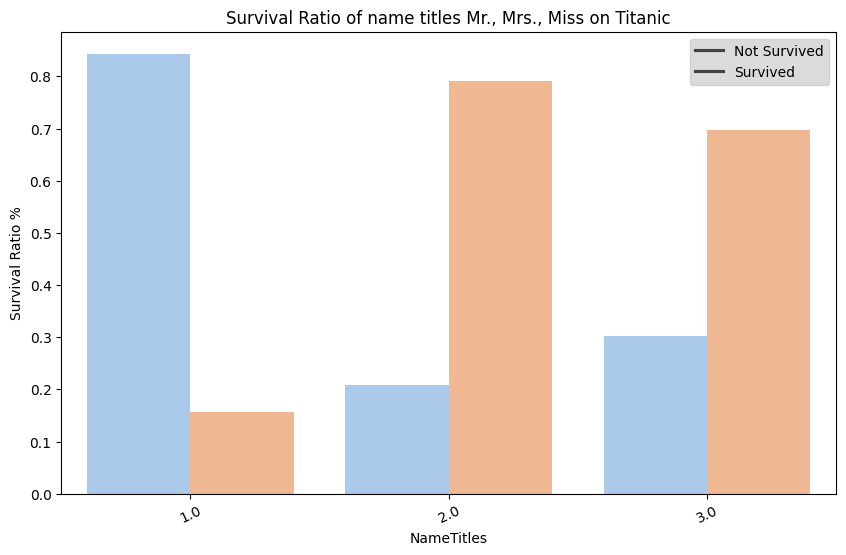

In [533]:
survival_ratio = df.groupby('NameTitles')['Survived'].value_counts(normalize=True).unstack().fillna(0)

# Reset index and reshape data for Seaborn
survival_ratio.reset_index(inplace=True)
survival_ratio = survival_ratio.melt(id_vars=['NameTitles'], value_vars=[0, 1], var_name='Survived', value_name='Survival Ratio')

# Enlarge the figure
plt.figure(figsize=(10, 6))

# Plot the survival ratio using Seaborn
sns.barplot(data=survival_ratio, x='NameTitles', y='Survival Ratio', hue='Survived', palette='pastel',legend='auto')
plt.title('Survival Ratio of name titles Mr., Mrs., Miss on Titanic')
plt.xlabel('NameTitles')
plt.ylabel('Survival Ratio %')
plt.legend(['Not Survived', 'Survived'], loc='upper right', facecolor='lightgrey')  # Changing legend facecolor
plt.xticks(rotation=25)
plt.show()

#### How did fare prices vary among different passenger classes?
- Compare the fare prices paid by passengers in first, second, and third class.

In [534]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'NameTitles'],
      dtype='object')

In [535]:
df[df.Pclass == 1].Fare

1      71.2833
3      53.1000
6      51.8625
11     26.5500
23     35.5000
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 216, dtype: float64

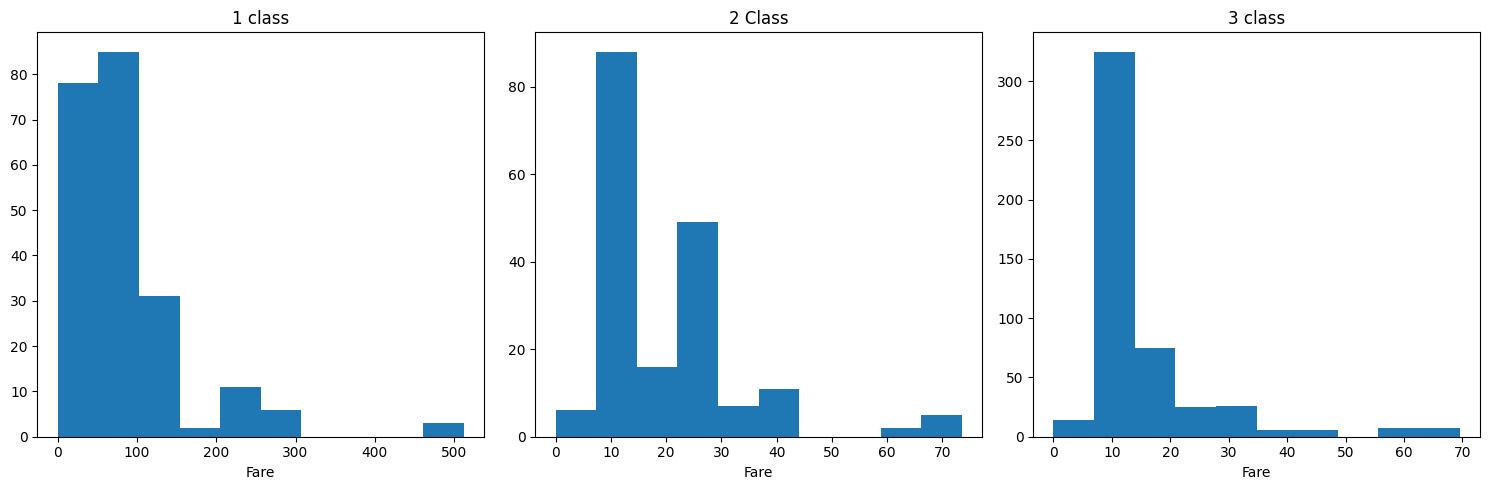

In [536]:
import matplotlib.pyplot as plt

# Assuming you have three arrays: data1, data2, and data3
data1 =  df[df.Pclass == 1].Fare
data2 = df[df.Pclass == 2].Fare
data3 =  df[df.Pclass == 3].Fare

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Adjust the figsize as needed

# Plot the first graph
axs[0].hist(data1)
axs[0].set_title('1 class')
axs[0].set_xlabel('Fare')
# Plot the second graph
axs[1].hist(data2)
axs[1].set_title('2 Class')
axs[1].set_xlabel('Fare')
# Plot the third graph
axs[2].hist(data3)
axs[2].set_title('3 class')
axs[2].set_xlabel('Fare')
# Show the plot
plt.tight_layout()  # Adjust subplots to fit into the figure area without overlapping
plt.show()


<h4>9.	Did having a cabin affect the survival rate?</h4>
- Analyze the survival rates of passengers with and without cabins.

In [537]:
cabinunique  = df.Cabin.unique()
cabinunique

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [538]:
df["Cabin"].fillna("No Cabin", inplace=True)

In [539]:
df[df.Cabin == 'C148']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameTitles
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C,1.0


In [540]:
cabinuniquevalues = []
for i in cabinunique:
    cabinuniquevalues.append([df[df.Cabin == i].Survived,df[df.Cabin == i].Cabin])

In [541]:
cabinuniquevalues

[[Series([], Name: Survived, dtype: int64),
  Series([], Name: Cabin, dtype: object)],
 [1    1
  Name: Survived, dtype: int64,
  1    C85
  Name: Cabin, dtype: object],
 [3      1
  137    0
  Name: Survived, dtype: int64,
  3      C123
  137    C123
  Name: Cabin, dtype: object],
 [6    0
  Name: Survived, dtype: int64,
  6    E46
  Name: Cabin, dtype: object],
 [10     1
  205    0
  251    0
  394    1
  Name: Survived, dtype: int64,
  10     G6
  205    G6
  251    G6
  394    G6
  Name: Cabin, dtype: object],
 [11    1
  Name: Survived, dtype: int64,
  11    C103
  Name: Cabin, dtype: object],
 [21    1
  Name: Survived, dtype: int64,
  21    D56
  Name: Cabin, dtype: object],
 [23    1
  Name: Survived, dtype: int64,
  23    A6
  Name: Cabin, dtype: object],
 [27     0
  88     1
  341    1
  438    0
  Name: Survived, dtype: int64,
  27     C23 C25 C27
  88     C23 C25 C27
  341    C23 C25 C27
  438    C23 C25 C27
  Name: Cabin, dtype: object],
 [31    1
  Name: Survived, dtype

In [542]:
df["Cabin"] = df["Cabin"].apply(lambda x: 0 if x == "No Cabin" else 1)

In [543]:
df[df.Cabin == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameTitles
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,1,S,1.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,1,S,3.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,1,S,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,1,S,2.0
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,1,S,1.0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,1,C,2.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,S,3.0


In [544]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameTitles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,S,3.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0,S,3.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1,C,1.0


In [545]:
df['Cabin'].value_counts(normalize=True)

Cabin
0    0.771044
1    0.228956
Name: proportion, dtype: float64

In [546]:
df.groupby('Cabin')['Survived'].value_counts(normalize=True)

Cabin  Survived
0      0           0.700146
       1           0.299854
1      1           0.666667
       0           0.333333
Name: proportion, dtype: float64

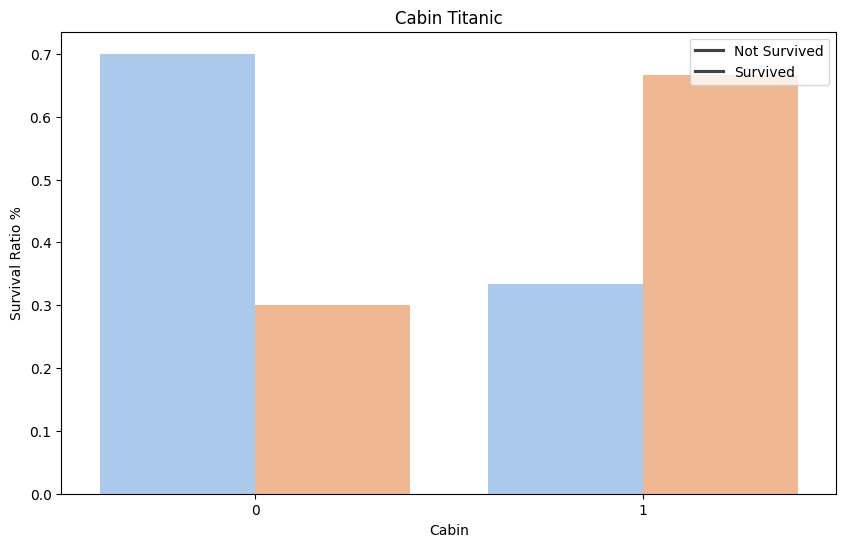

In [547]:
survival_ratio = df.groupby('Cabin')['Survived'].value_counts(normalize=True).unstack().fillna(0)

# Reset index and reshape data for Seaborn
survival_ratio.reset_index(inplace=True)
survival_ratio = survival_ratio.melt(id_vars=['Cabin'], value_vars=[0, 1], var_name='Survived', value_name='Survival Ratio')

# Enlarge the figure
plt.figure(figsize=(10, 6))

# Plot the survival ratio using Seaborn
sns.barplot(data=survival_ratio, x='Cabin', y='Survival Ratio', hue='Survived', palette='pastel')#,legend='auto')
plt.title('Cabin Titanic')
plt.xlabel('Cabin')
plt.ylabel('Survival Ratio %')
plt.legend(['Not Survived', 'Survived'], loc='upper right')#, facecolor='lightgrey')  # Changing legend facecolor
plt.xticks(rotation=0)
plt.show()

#### 10.	What was the survival rate among passengers with missing data (e.g., missing age or cabin information)?
- Analyze the survival rates of passengers with missing data in various fields.


In [548]:
# import numpy as np
df[df.isna().any(axis=1)].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
NameTitles      67
dtype: int64

- Embarked column

In [549]:
df['Embarked'] = df['Embarked'].replace(['S', 'Q', 'C'], [1, 2, 3])

In [550]:
df.Embarked.isna().sum()

2

In [557]:
df.Embarked.fillna(0,inplace=True)

In [558]:
df.Embarked.isna().sum()

0

In [570]:
df.Embarked.value_counts()

Embarked
1.0    644
3.0    168
2.0     77
0.0      2
Name: count, dtype: int64

In [571]:
nullembarked = df[df.Embarked == 0]
nullembarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameTitles
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,1,0.0,3.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,1,0.0,2.0


In [575]:
nullembarked.groupby('Embarked')['Survived'].value_counts(normalize=True)*100

Embarked  Survived
0.0       1           100.0
Name: proportion, dtype: float64

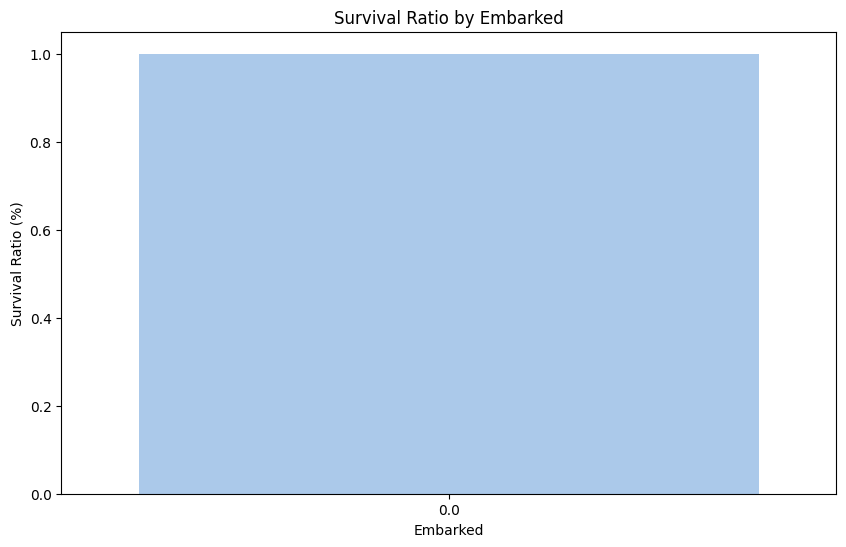

In [573]:
# Calculate survival ratio
survival_ratio = nullembarked.groupby('Embarked')['Survived'].value_counts(normalize=True).unstack().fillna(0)

# Reset index and reshape data for Seaborn
survival_ratio.reset_index(inplace=True)

# Rename columns for clarity
survival_ratio.rename(columns={0: 'Not Survived', 1: 'Survived'}, inplace=True)

# Enlarge the figure
plt.figure(figsize=(10, 6))

# Plot the survival ratio using Seaborn
sns.barplot(data=survival_ratio, x='Embarked', y='Survived', palette='pastel')
plt.title('Survival Ratio by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Ratio (%)')
plt.xticks(rotation=0)
plt.show()

- lets fill na with 0 Age

In [563]:
df.Age.fillna(0,inplace=True)

In [566]:
nullage = df[df.Age == 0]

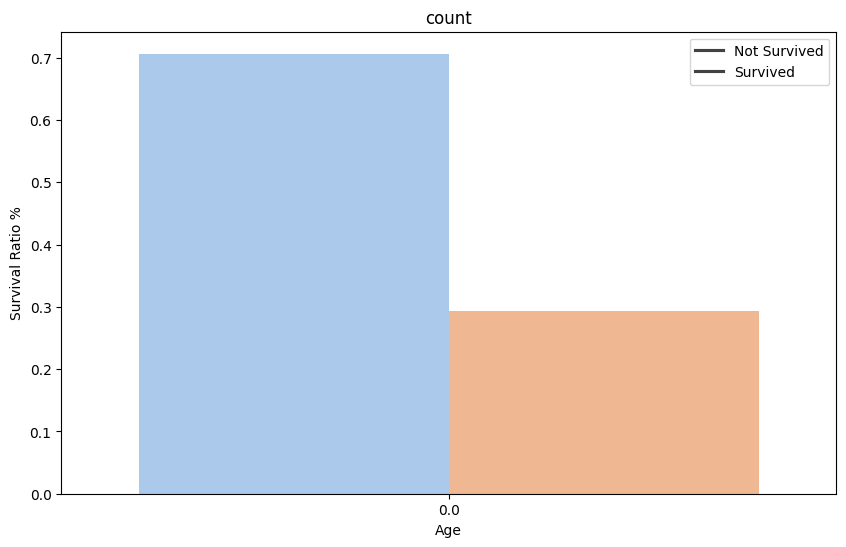

In [567]:
survival_ratio = nullage.groupby('Age')['Survived'].value_counts(normalize=True).unstack().fillna(0)

# Reset index and reshape data for Seaborn
survival_ratio.reset_index(inplace=True)
survival_ratio = survival_ratio.melt(id_vars=['Age'], value_vars=[0, 1], var_name='Survived', value_name='Survival Ratio')

# Enlarge the figure
plt.figure(figsize=(10, 6))

# Plot the survival ratio using Seaborn
sns.barplot(data=survival_ratio, x='Age', y='Survival Ratio', hue='Survived', palette='pastel')#,legend='auto')
plt.title('count')
plt.xlabel('Age')
plt.ylabel('Survival Ratio %')
plt.legend(['Not Survived', 'Survived'], loc='upper right')#, facecolor='lightgrey')  # Changing legend facecolor
plt.xticks(rotation=0)
plt.show()

In [576]:
df.NameTitles.value_counts()

NameTitles
1.0    517
3.0    182
2.0    125
Name: count, dtype: int64

In [577]:
df.NameTitles.fillna(0,inplace=True)

In [578]:
df.NameTitles.value_counts()

NameTitles
1.0    517
3.0    182
2.0    125
0.0     67
Name: count, dtype: int64

In [579]:
nullNameTitles = df[df.NameTitles == 0]

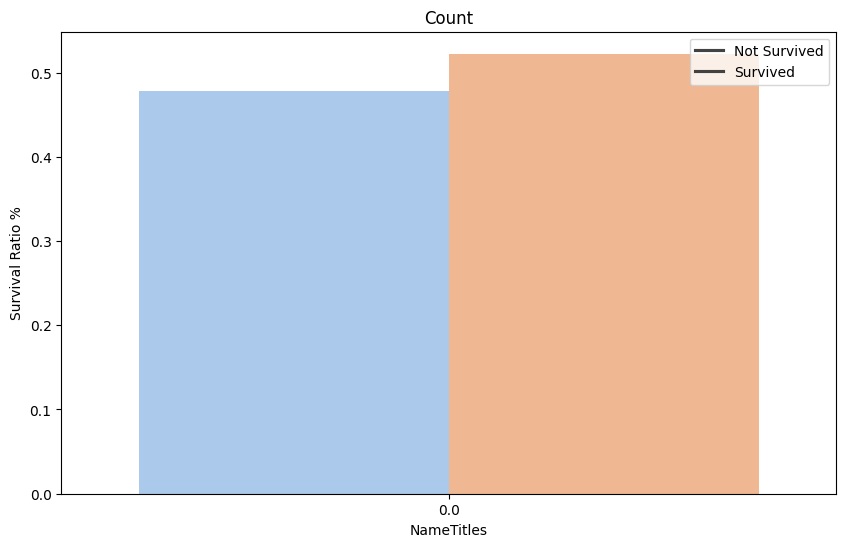

In [580]:
survival_ratio = nullNameTitles.groupby('NameTitles')['Survived'].value_counts(normalize=True).unstack().fillna(0)

# Reset index and reshape data for Seaborn
survival_ratio.reset_index(inplace=True)
survival_ratio = survival_ratio.melt(id_vars=['NameTitles'], value_vars=[0, 1], var_name='Survived', value_name='Survival Ratio')

# Enlarge the figure
plt.figure(figsize=(10, 6))

# Plot the survival ratio using Seaborn
sns.barplot(data=survival_ratio, x='NameTitles', y='Survival Ratio', hue='Survived', palette='pastel')#,legend='auto')
plt.title('Count')
plt.xlabel('NameTitles')
plt.ylabel('Survival Ratio %')
plt.legend(['Not Survived', 'Survived'], loc='upper right')#, facecolor='lightgrey')  # Changing legend facecolor
plt.xticks(rotation=0)
plt.show()